In [1]:
import pandas
import numpy
import gdal
import georasters as gr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn import preprocessing
import math

In [2]:
# Iron
fe_df = gr.from_file('LP_GRS_Fe_Global_2ppd.tif').to_pandas()

# The following is based off of Edwin's code
xRange_fe = fe_df['x'].max() - fe_df['x'].min()
yRange_fe = fe_df['y'].max() - fe_df['y'].min()

section_fe = math.ceil(xRange_fe/10)         #Manually put 10 to have 10 x 10 matrix
ySection_fe = math.ceil(yRange_fe/10)

min_fe = fe_df['x'].min()
max_fe = fe_df['x'].max()

ymin_fe = fe_df['y'].min()
ymax_fe = fe_df['y'].max()

d={}
for x in range(0,10):
    for y in range(0,10):
        d["matrix{0}{1}".format(x,y)]=fe_df[(min_fe+x*section_fe <= fe_df['x']) & (fe_df['x'] < min_fe+(x+1)*section_fe) & (ymin_fe+y*ySection_fe <= fe_df['y']) & (fe_df['y'] < ymin_fe+(y+1)*ySection_fe)]

# Will contain the log(standard deviation) of each value in the 10x10 matrix (Using this for scatterplot)
fe_log_arr = []                             
for key, value in d.items():
    fe_key_std = numpy.std(d[key].value)
    fe_key_log = numpy.log(fe_key_std)
    fe_log_arr.append(fe_key_log)

In [3]:
# Hydrogen
h_df = gr.from_file('LP_GRS_H_Global_2ppd.tif').to_pandas()

xRange_h = h_df['x'].max() - h_df['x'].min()
yRange_h = h_df['y'].max() - h_df['y'].min()

section_h = math.ceil(xRange_h/10)
ySection_h = math.ceil(yRange_h/10)

min_h = h_df['x'].min()
max_h = h_df['x'].max()

ymin_h = h_df['y'].min()
ymax_h = h_df['y'].max()

h_d={}
for x in range(0,10):
    for y in range(0,10):
        h_d["matrix{0}{1}".format(x,y)]=h_df[(min_h+x*section_h <= h_df['x']) & (h_df['x'] < min_h+(x+1)*section_h) & (ymin_h+y*ySection_h <= h_df['y']) & (h_df['y'] < ymin_h+(y+1)*ySection_h)]

h_log_arr = []
for key, value in h_d.items():
    h_key_std = numpy.std(h_d[key].value)
    h_key_log = numpy.log(h_key_std)
    h_log_arr.append(h_key_log)

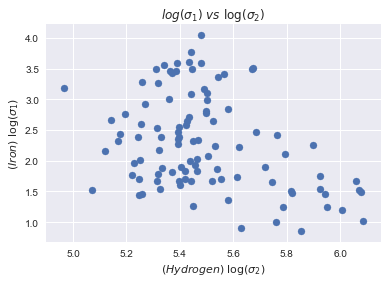

In [4]:
plt.title(r'$log(\sigma_1)\ vs\ \log(\sigma_2)$')
plt.xlabel(r'$(Hydrogen)\ \log(\sigma_2)$')
plt.ylabel(r'$(Iron)\ \log(\sigma_1)$')
# plt(x,y) -> plt(hydrogen, iron) since first element should be on y axis and second element on x axis based on visualization paper
plt.scatter(h_log_arr, fe_log_arr)
plt.show()

In [5]:
# Log(sigma) of Iron vs Correlation

fe = fe_df.corr()
h = h_df.corr()
iron = fe.value
hydrogen = h.value

correlation = numpy.corrcoef(fe, h)

# This loops through the correlation matrix and puts all the points into a single array.
corr_d=[]
for x in range(0, len(correlation)):
    for y in range(0, len(correlation)):
        corr_d.append(correlation[x][y])

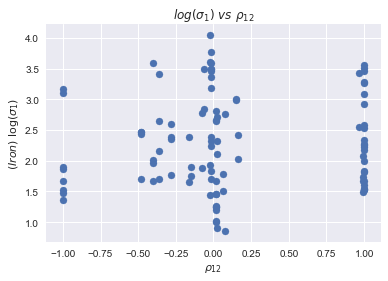

In [6]:
# Graph between log(sigma) of Iron and Correlation between Iron and Hydrogen (p12)
plt.title(r'$log(\sigma_1)\ vs\ \rho_{12}$')
plt.xlabel(r'$\rho_{12}$')
plt.ylabel(r'$(Iron)\ \log(\sigma_1)$')
plt.scatter(corr_d, fe_log_arr)
plt.show()